In [26]:
pwd

'C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\NoteBooks'

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats
from pygeocoder import Geocoder

from datetime import datetime

In [28]:
riders = pd.read_csv(
    'C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\riders.csv'
)

In [29]:
riders.head(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466


In [30]:
riders.nunique()

Rider Id          960
No_Of_Orders      811
Age               725
Average_Rating     45
No_of_Ratings     553
dtype: int64

In [31]:
riders.isnull().sum()

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

In [32]:
riders['Average_Rating'].unique()

array([14. , 13.5, 14.3, 12.5, 13.7, 13.2, 13.4, 14.1, 14.2, 13.1, 14.4,
       13.3, 13.6, 13.9, 13.8, 12.3, 14.5, 12.9, 12.8, 13. , 12.7, 15. ,
       14.9,  0. , 14.7, 12.4, 14.6, 12.6, 14.8, 11.2, 11.6, 12. , 11.1,
       11.3, 15.2, 10.8,  6. ,  3. ,  9.8,  7.8, 11.8, 15.1,  9. ,  9.6,
       10.2])

In [33]:
riders['Average_Rating'].describe()

count    960.000000
mean      13.412604
std        2.675794
min        0.000000
25%       13.500000
50%       14.000000
75%       14.300000
max       15.200000
Name: Average_Rating, dtype: float64

In [34]:
riders.sample(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
573,Rider_Id_315,1963,1091,13.9,576
558,Rider_Id_199,1683,2300,13.9,300
153,Rider_Id_482,1415,1516,13.5,519


In [35]:
np.where(riders['No_Of_Orders']<riders['No_of_Ratings'])

(array([], dtype=int64),)

In [36]:
riders['Total_ratings'] = riders['Average_Rating'] * riders['No_of_Ratings']
riders['Trips_not_rated'] = riders['No_Of_Orders'] - riders['No_of_Ratings']
riders['No_of_riders_to_ratings'] = riders['No_Of_Orders']/riders['No_of_Ratings']

In [37]:
np.array(riders['Average_Rating'])[:30]

array([14. , 13.5, 14.3, 12.5, 13.7, 13.2, 13.4, 14.1, 14.2, 13.4, 14.3,
       14.3, 13.1, 14.4, 14.1, 13.5, 13.3, 14.1, 13.6, 14.1, 13.9, 14.2,
       14.2, 13.4, 14.2, 14.2, 14.2, 13.8, 12.3, 13.9])

In [38]:
riders['Avg_rating_bin'] = np.array(np.floor(np.array(riders['Average_Rating'])))

In [39]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Total_ratings,Trips_not_rated,No_of_riders_to_ratings,Avg_rating_bin
0,Rider_Id_396,2946,2298,14.0,1159,16226.0,1787,2.541846,14.0
1,Rider_Id_479,360,951,13.5,176,2376.0,184,2.045455,13.0
2,Rider_Id_648,1746,821,14.3,466,6663.8,1280,3.746781,14.0
3,Rider_Id_753,314,980,12.5,75,937.5,239,4.186667,12.0
4,Rider_Id_335,536,1113,13.7,156,2137.2,380,3.435897,13.0


In [40]:
print(riders['Avg_rating_bin'].min())
print(riders['Avg_rating_bin'].max())

0.0
15.0


In [41]:
def cat_ratings(rating):
    if rating in range(0, 5):
        return 'poor'
    elif rating in range(5, 9):
        return 'fair'
    elif rating in range(9, 13):
        return 'good'
    elif rating in range(13, 16):
        return 'excellent'
    
riders['Avg_rating_cat'] = riders['Avg_rating_bin'].map(cat_ratings)

In [42]:
riders['Avg_rating_cat'].unique()

array(['excellent', 'good', 'poor', 'fair'], dtype=object)

In [43]:
#riders.head(3)

In [44]:
riders['Orders_per_day'] = (riders['No_Of_Orders']-1)/riders['Age']

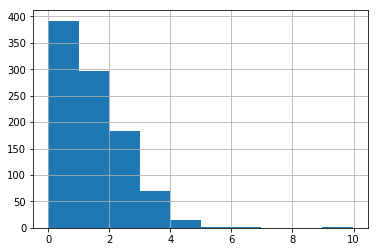

In [45]:
riders['Orders_per_day'].hist()

In [46]:
#riders.head(3)

In [47]:
riders.drop(['No_Of_Orders', 'Age'], axis=1, inplace=True)

In [48]:
riders.head(3)

,Rider Id,Average_Rating,No_of_Ratings,Total_ratings,Trips_not_rated,No_of_riders_to_ratings,Avg_rating_bin,Avg_rating_cat,Orders_per_day
0,Rider_Id_396,14.0,1159,16226.0,1787,2.541846,14.0,excellent,1.281549
1,Rider_Id_479,13.5,176,2376.0,184,2.045455,13.0,excellent,0.377497
2,Rider_Id_648,14.3,466,6663.8,1280,3.746781,14.0,excellent,2.125457


In [49]:
len(riders['Rider Id'].unique())

960

In [50]:
riders.shape

(960, 9)

In [51]:
riders.to_csv('riders_modified.csv', index=True)